In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
import xgboost as xgb

from sklearn.model_selection import TimeSeriesSplit

In [2]:
df = pd.read_csv(r"C:\Users\sabri\Downloads\Solar_Energy_Production.csv")
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df.head()

,name,id,address,kWh,public_url,installationDate,uid
date,,,,,,,
2017-11-09 08:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,1.130,https://monitoring.solaredge.com/solaredge-web...,07/11/2016,3141062017-09-11 08:00:00
2017-11-09 09:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2.340,https://monitoring.solaredge.com/solaredge-web...,07/11/2016,3141062017-09-11 09:00:00
2017-11-09 10:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,3.656,https://monitoring.solaredge.com/solaredge-web...,07/11/2016,3141062017-09-11 10:00:00
2017-11-09 11:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,4.577,https://monitoring.solaredge.com/solaredge-web...,07/11/2016,3141062017-09-11 11:00:00
2017-11-09 12:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,6.506,https://monitoring.solaredge.com/solaredge-web...,07/11/2016,3141062017-09-11 12:00:00


## EDA

In [3]:
df['name'].value_counts()

Southland Leisure Centre                     36244
Whitehorn Multi-Service Centre               32551
City of Calgary North Corporate Warehouse    31798
Richmond - Knob Hill Community Hall          31175
Calgary Fire Hall Headquarters               30246
Glenmore Water Treatment Plant               30028
Bearspaw Water Treatment Plant               29404
CFD Firehall #7                              27309
Manchester Building M                        26968
Hillhurst Sunnyside Community Association    25191
Telus Spark                                    317
Name: name, dtype: int64

In [4]:
#solar energy production per site
production_per_site_0 = df.groupby('name')['kWh'].sum()

production_per_site = pd.DataFrame(production_per_site_0).sort_values(by = 'kWh', ascending=False)

production_per_site.style.background_gradient(cmap='cool')

,kWh
name,
Bearspaw Water Treatment Plant,111808536.546000
Whitehorn Multi-Service Centre,65508688.243000
Southland Leisure Centre,25811559.291000
Glenmore Water Treatment Plant,22979711.898000
City of Calgary North Corporate Warehouse,18437735.757000
CFD Firehall #7,4710587.817000
Manchester Building M,3802022.057000
Calgary Fire Hall Headquarters,3062372.369000
Richmond - Knob Hill Community Hall,2826658.145000


## Southland leisure centre

In [5]:
slc = df[df['name'] == 'Southland Leisure Centre']
slc

,name,id,address,kWh,public_url,installationDate,uid
date,,,,,,,
2017-06-09 07:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,3.663,https://monitoring.solaredge.com/solaredge-web...,01/09/2015,1644402017-09-06 07:00:00
2017-06-09 08:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,16.378,https://monitoring.solaredge.com/solaredge-web...,01/09/2015,1644402017-09-06 08:00:00
2017-06-09 09:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,37.839,https://monitoring.solaredge.com/solaredge-web...,01/09/2015,1644402017-09-06 09:00:00
2017-06-09 10:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,70.572,https://monitoring.solaredge.com/solaredge-web...,01/09/2015,1644402017-09-06 10:00:00
2017-06-09 11:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,90.109,https://monitoring.solaredge.com/solaredge-web...,01/09/2015,1644402017-09-06 11:00:00
...,...,...,...,...,...,...,...
2024-03-02 13:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,8903.982,https://monitoringpublic.solaredge.com/solared...,01/09/2015,164440-2024-02-03 13:00:00
2024-03-02 14:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,11437.516,https://monitoringpublic.solaredge.com/solared...,01/09/2015,164440-2024-02-03 14:00:00
2024-03-02 15:00:00,Southland Leisure Centre,164440,2000 SOUTHLAND DR SW,5190.695,https://monitoringpublic.solaredge.com/solared...,01/09/2015,164440-2024-02-03 15:00:00


In [6]:
#slc hourly production
hourly_production = pd.DataFrame(slc['kWh'])

hourly_production.head(10).style.background_gradient(cmap = 'RdBu')

,kWh
date,
2017-06-09 07:00:00,3.663000
2017-06-09 08:00:00,16.378000
2017-06-09 09:00:00,37.839000
2017-06-09 10:00:00,70.572000
2017-06-09 11:00:00,90.109000
2021-08-22 07:00:00,1.812000
2021-08-22 08:00:00,14.595000
2021-08-22 10:00:00,82.237000
2021-08-22 11:00:00,98.787000


In [7]:
#daily production 

#adds up the hourly energy data into daily totals
daily_production_0 = hourly_production.groupby(hourly_production.index.date)['kWh'].sum()

daily_production = pd.DataFrame(daily_production_0)

daily_production.head(10).style.background_gradient(cmap='PRGn')

,kWh
2015-01-09,286.013000
2015-01-10,1134.745000
2015-01-11,132.539000
2015-01-12,164.016000
2015-02-09,681.646000
2015-02-10,643.011000
2015-02-11,9.812000
2015-02-12,97.701000
2015-03-09,647.906000
2015-03-10,66.554000


## Outlier removal 

<AxesSubplot:title={'center':'Southland leisure centre kWh solar energy hourly production'}, xlabel='date'>

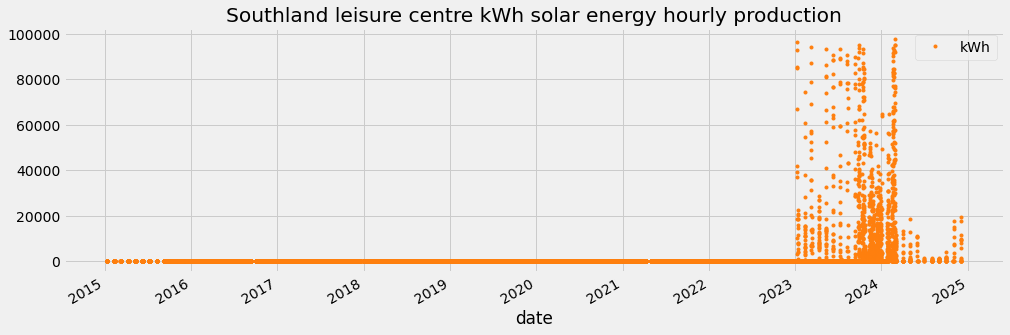

In [8]:
#viz to see the distribution 
hourly_production.plot(style='.', figsize=(15, 5), color = color_pal[1], title = 'Southland leisure centre kWh solar energy hourly production')

<AxesSubplot:title={'center':'South leisure centre kWh solar energy daily production'}>

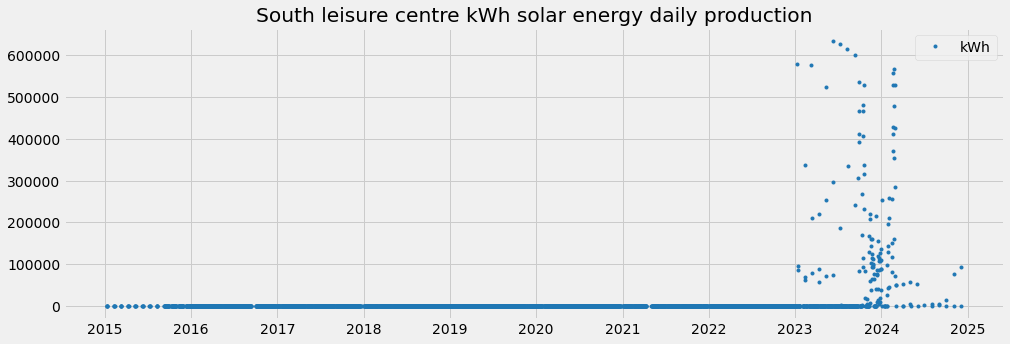

In [9]:
daily_production.plot(style= '.', figsize=(15, 5), color = color_pal [0], title ='South leisure centre kWh solar energy daily production')

## According to research, a small to medium size plant generates 40-100kWh per hour. a large-scale one generates 100-300 kWh per hour

<AxesSubplot:xlabel='date'>

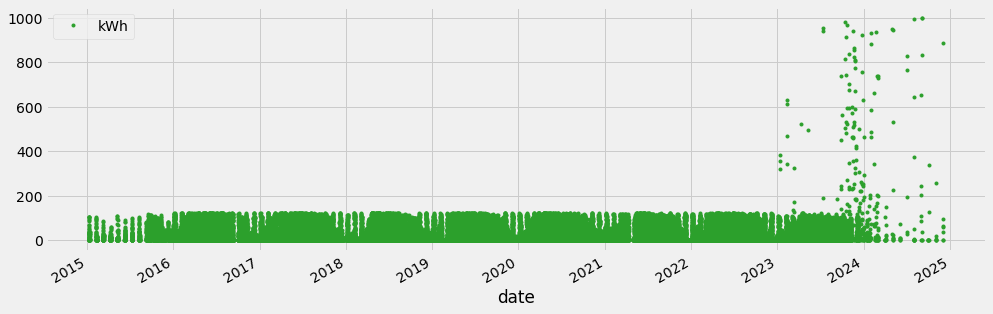

In [10]:
hourly_production.query('kWh < 1000').plot(style = '.', figsize=(15, 5), color = color_pal[2])

<AxesSubplot:xlabel='date'>

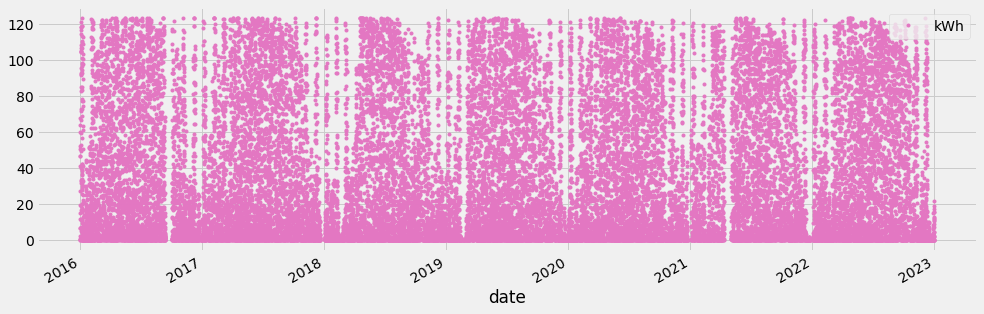

In [26]:
#take records with kWh < 300 from 2015 to 2022
df1 = hourly_production[(hourly_production.index.year >= 2016) & (hourly_production.index.year <= 2022) & (hourly_production['kWh'] < 300)  & (hourly_production['kWh'] > 0)].copy()
df1.plot(style = '.', figsize=(15, 5), color = color_pal[6])

## Train/test split

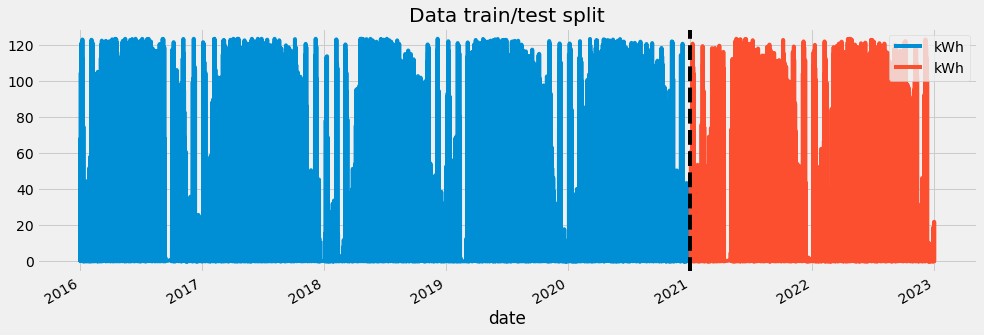

In [27]:
train = df1.loc[df1.index < '12-31-2020']
test = df1.loc[df1.index >= '12-31-2020']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label = 'Training set', title = 'Data train/test split')
test.plot(ax=ax, label ='Test set')
ax.axvline('12-31-2020', color='black', ls='--')
ax.legend = (['Training set', 'Test set'])


<AxesSubplot:title={'center':'week of data'}, xlabel='date'>

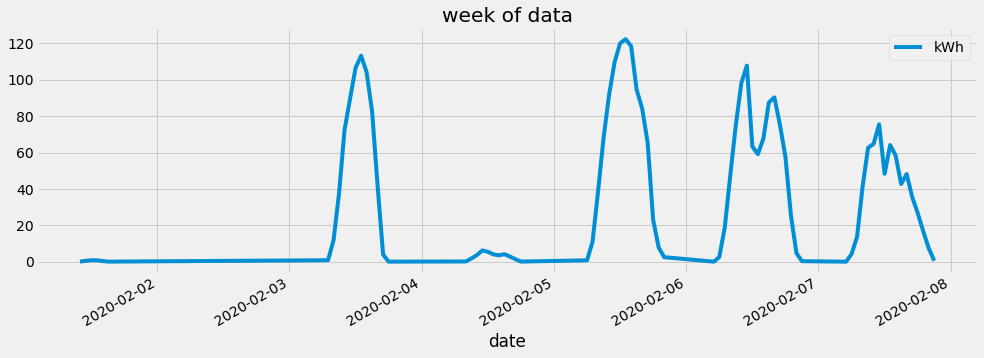

In [28]:
## Visualise week of data
df1.loc[(df1.index > '02-01-2020') & (df1.index < '02-08-2020')].plot(figsize=(15, 5), title = 'week of data')

## Feature Creation - time series & lag features

### Time series features

In [29]:
#create time series features based on time series index 
def create_features(df):
    
    df = df1.copy()
    df['hour']= df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.year
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

df1 = create_features(df1)

### Lag features - to look back in the past, however many days, what was the target(x) days in the past

In [42]:
target_map = df1['kWh'].to_dict()
target_map

{Timestamp('2017-06-09 07:00:00'): 3.663,
 Timestamp('2017-06-09 08:00:00'): 16.378,
 Timestamp('2017-06-09 09:00:00'): 37.839,
 Timestamp('2017-06-09 10:00:00'): 70.572,
 Timestamp('2017-06-09 11:00:00'): 90.109,
 Timestamp('2021-08-22 07:00:00'): 1.812,
 Timestamp('2021-08-22 08:00:00'): 14.595,
 Timestamp('2021-08-22 10:00:00'): 82.237,
 Timestamp('2021-08-22 11:00:00'): 98.787,
 Timestamp('2021-08-22 12:00:00'): 114.381,
 Timestamp('2021-08-22 13:00:00'): 108.897,
 Timestamp('2021-08-22 14:00:00'): 72.488,
 Timestamp('2021-08-22 15:00:00'): 101.513,
 Timestamp('2021-08-22 16:00:00'): 93.615,
 Timestamp('2021-08-22 17:00:00'): 57.918,
 Timestamp('2021-08-22 18:00:00'): 6.946,
 Timestamp('2021-08-22 19:00:00'): 4.679,
 Timestamp('2021-08-22 20:00:00'): 0.187,
 Timestamp('2017-06-09 12:00:00'): 100.293,
 Timestamp('2017-06-09 13:00:00'): 103.664,
 Timestamp('2017-06-09 14:00:00'): 102.974,
 Timestamp('2017-06-09 15:00:00'): 92.174,
 Timestamp('2017-06-09 16:00:00'): 75.909,
 Timestamp

In [43]:
#364 is divisible by 7 and will give u the exact same days of the week 
def lag_features(df):
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    
    return df


In [44]:
df1__ = lag_features(df1)

## Visualise our target  feature/target relationship

Text(0.5, 1.0, 'kWh by hour')

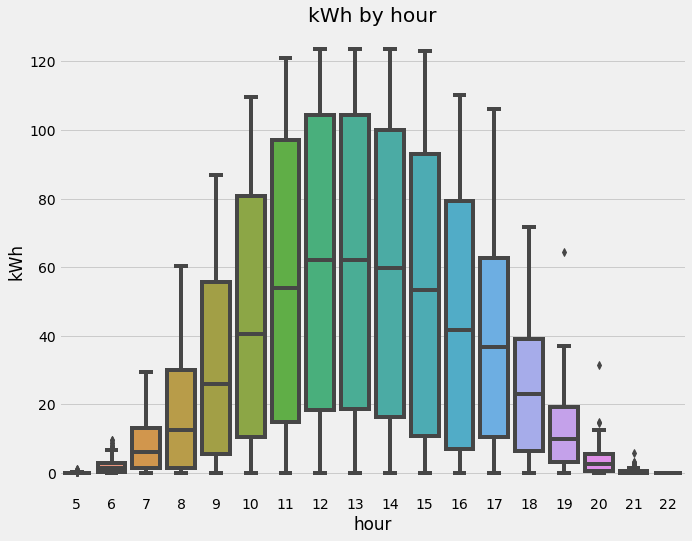

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1, x='hour', y='kWh')
ax.set_title('kWh by hour')

Text(0.5, 1.0, 'kWh by month')

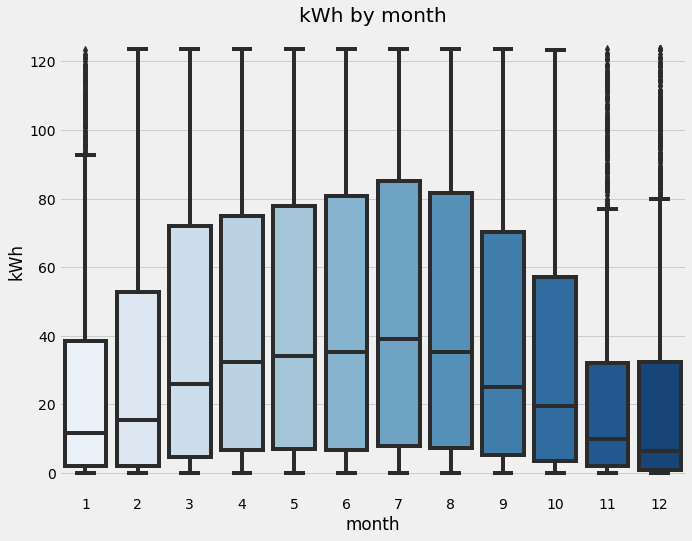

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = df1, x='month', y='kWh', palette = 'Blues')
ax.set_title('kWh by month')

## Model creation 


In [32]:
train = df1.loc[df1.index < '12-31-2020']
test = df1.loc[df1.index >= '12-31-2020']

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth']
TARGET = 'kWh'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [33]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                      n_estimators = 1000, #number of trees this algorithm will create
                      early_stopping_rounds = 50,
                      objective='reg:linear',
                      max_depth = 3,
                      learning_rate = 0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:53.07447	validation_1-rmse:54.14901


C:\Users\sabri\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [10:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:34.90355	validation_1-rmse:35.32894
[200]	validation_0-rmse:29.55031	validation_1-rmse:29.90964
[300]	validation_0-rmse:27.43328	validation_1-rmse:27.75640
[400]	validation_0-rmse:26.31221	validation_1-rmse:26.65861
[500]	validation_0-rmse:25.54938	validation_1-rmse:26.01812
[600]	validation_0-rmse:25.00561	validation_1-rmse:25.59942
[700]	validation_0-rmse:24.61194	validation_1-rmse:25.32822
[800]	validation_0-rmse:24.29097	validation_1-rmse:25.12246
[900]	validation_0-rmse:24.03418	validation_1-rmse:24.97217
[999]	validation_0-rmse:23.83149	validation_1-rmse:24.86266


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Feature importance 

<AxesSubplot:title={'center':'Feature Importance'}>

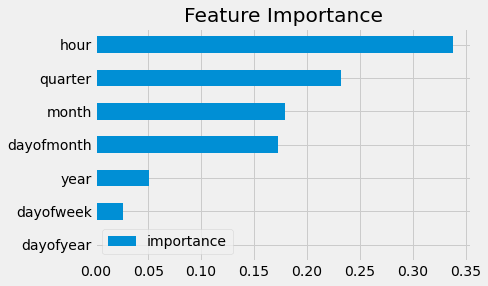

In [34]:
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_, columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title= 'Feature Importance')

## Forecast on the test set 


In [35]:
test['prediction'] = reg.predict(X_test)

C:\Users\sabri\AppData\Local\Temp\ipykernel_34528\2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [36]:
df1 = df1.merge(test[['prediction']], how='left', left_index = True, right_index=True)


Text(0.5, 1.0, 'Truth data vs. prediction')

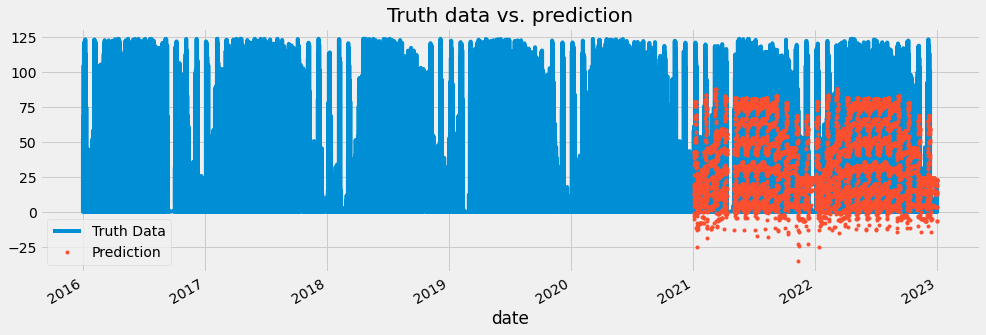

In [37]:
ax = df1[['kWh']].plot(figsize=(15, 5))
df1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Truth data vs. prediction')

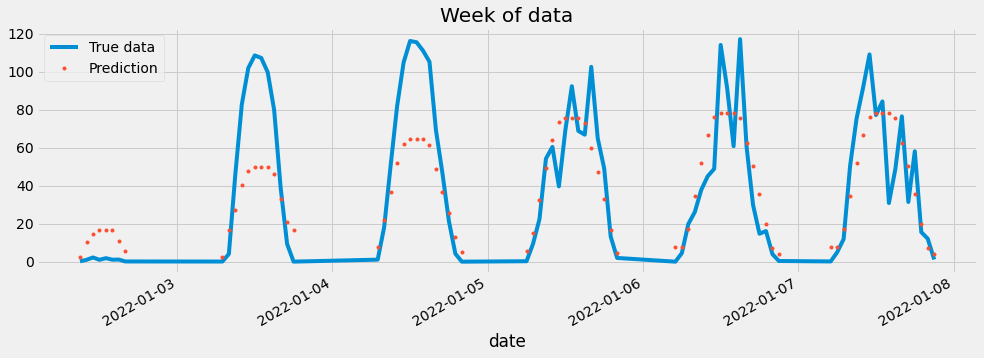

In [39]:
ax = df1.loc[(df1.index > '01-01-2022') & (df1.index < '01-08-2022')]['kWh'] \
    .plot(figsize=(15, 5), title='Week of data')
df1.loc[(df1.index > '01-01-2022') & (df1.index < '01-08-2022')]['prediction'] \
    .plot(style='.')
plt.legend(['True data','Prediction'])

## Evaluation - RMSE 

In [40]:
score = np.sqrt(mean_squared_error(test['kWh'], test['prediction']))
print (f'{score: 0.2f}')

 24.86
